In [11]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
import seaborn as sns


import mplcursors
import mpldatacursor



In [12]:
# Identifying current directory

current_directory = os.getcwd()
print(current_directory)

/Users/suparnaroy/Library/CloudStorage/GoogleDrive-roysuparna.sr@gmail.com/Other computers/My Laptop/CV & Certifications/Projects: Internships/Session_Angel


In [13]:
scores_data = pd.read_csv("provisional_results.csv")
scores_data.head()

,Pid,text data,Class labels,predicted_classes,predicted_raw_scores
0,test_pid_1,im scared lie every day say ill make think mig...,moderate,0,0.498533
1,test_pid_2,new wanted vent finally realized kind bad ment...,moderate,0,0.499537
2,test_pid_3,sad kinda always issue say bad peer definitely...,moderate,1,0.249972
3,test_pid_4,lonely alone immediately family member dead da...,moderate,0,0.460132
4,test_pid_5,year trash dont know posting even know talking...,moderate,0,0.487959


In [14]:
scores_data['date'] = pd.date_range(start="01/01/2023", periods= len(scores_data), freq= 'D')
scores_data.head()

,Pid,text data,Class labels,predicted_classes,predicted_raw_scores,date
0,test_pid_1,im scared lie every day say ill make think mig...,moderate,0,0.498533,2023-01-01
1,test_pid_2,new wanted vent finally realized kind bad ment...,moderate,0,0.499537,2023-01-02
2,test_pid_3,sad kinda always issue say bad peer definitely...,moderate,1,0.249972,2023-01-03
3,test_pid_4,lonely alone immediately family member dead da...,moderate,0,0.460132,2023-01-04
4,test_pid_5,year trash dont know posting even know talking...,moderate,0,0.487959,2023-01-05


In [15]:
scores_data['text data'] = scores_data['text data'].astype(str)
scores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Pid                   3245 non-null   object        
 1   text data             3245 non-null   object        
 2   Class labels          3245 non-null   object        
 3   predicted_classes     3245 non-null   int64         
 4   predicted_raw_scores  3245 non-null   float64       
 5   date                  3245 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 152.2+ KB


In [16]:
#Filter the data to keep only relevant rows
data = scores_data.iloc[:90]

# Create the plot using Plotly Express and add annotations for each data point using 'text data' column
fig = px.line(data, x='date', y='predicted_raw_scores', color_discrete_sequence=['#5d35f2'],  hover_data={'text data': True})

# Adjust x-axis date ticks at the gap of 6 days
fig.update_xaxes(nticks = 15)

# Adjust layout settings
fig.update_layout(title= dict(text = 'Predicted Scores', font = dict(size=20), x=0.5, xref="paper") ,
                  xaxis=dict(tickangle=45, showline=True, linewidth=1, linecolor='black', mirror=True),
                  yaxis=dict(showline=True, linewidth=1, linecolor='black', mirror=True),
                  width=800, height=400,
                  )

# Show the plot
fig.show()

In [17]:
# @hidden_cell        
sns.set(rc={'axes.facecolor':'#c0cefa'}) # graph facecolor
font_color = '#525252'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
ann_color = '#c449cc' # annotation color

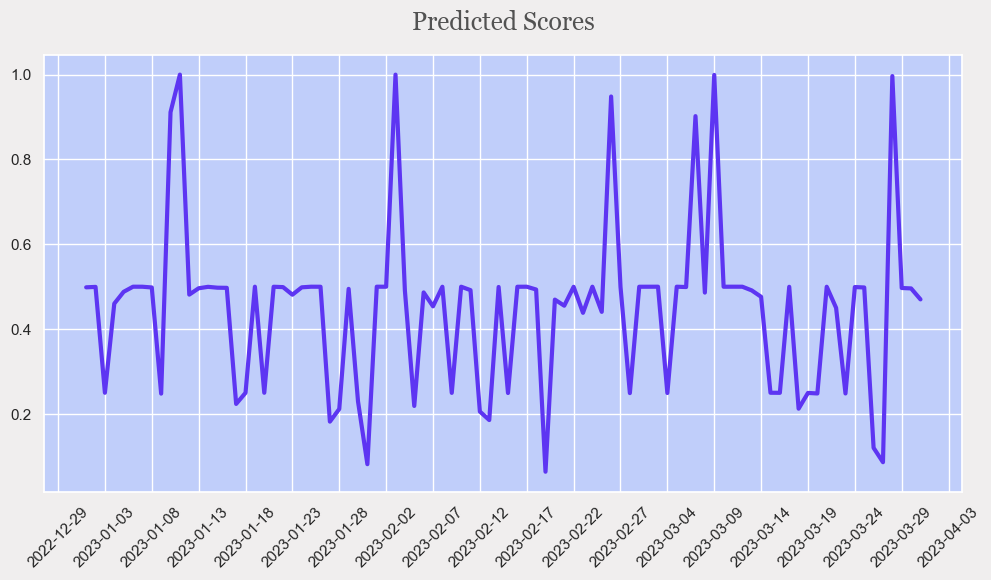

In [18]:
# @hidden_cell        

fig, ax = plt.subplots(facecolor='#f0eeee')
fig.set_size_inches(10, 5)
line, = ax.plot('date', 'predicted_raw_scores', data=scores_data.iloc[:90], color='#5d35f2', linewidth=3)


# # Annotate each data point with the text from another column 'text data'
# for i, row in scores_data.iloc[:90].iterrows():
#     ax.annotate(row['text data'],  # The text to be shown
#                 xy=(row['date'], row['predicted_raw_scores']),  # The coordinates of the data point to annotate
#                 xytext=(5, 5),  # The position of the text relative to the data point (in points)
#                 textcoords='offset points',  # Use 'offset points' to specify the position as an offset from data point
#                 color='black',  # Text color
#                 fontsize=12,  # Text font size
#                 ha='left',  # Horizontal alignment ('left', 'right', or 'center')
#                 va='bottom'  # Vertical alignment ('top', 'bottom', 'center', 'baseline', or 'center_baseline')
#                 )


# # Annotate each data point with the text from another column 'text data'
# def on_hover(sel):
#     index = sel.target.index
#     row = scores_data.iloc[index]
#     annotation_text = row['text data']
#     sel.annotation.set_text(annotation_text)

# mplcursors.cursor(line).connect("add", on_hover)  # Connect the on_hover function to mplcursors


# Annotate each data point with the text from another column 'text data'
def formatter(**kwargs):
    index = kwargs['index']
    row = scores_data.iloc[index]
    annotation_text = row['text data']
    return f"Annotation: {annotation_text}"

# Connect mpldatacursor to the plot
mpldatacursor.datacursor(hover=True, formatter=formatter)


plt.tight_layout()

# Set x-axis major locator and tick rotation
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=45)

# Set title
ttl = ax.set_title('Predicted Scores', fontsize=18, pad=18, color=font_color, **csfont)
ttl.set_position([.5, 1.02])

plt.show()